# PREMIERE PARTIE : PREDICTION

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [34]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


# Étape 1 : Préparation des Données
## 1. Vérifier les doublons

In [35]:
df.duplicated().sum()

np.int64(0)

## 2. Convertir la colonne date

In [36]:
df["date"] = pd.to_datetime(df["date"])
df["year_sold"] = df["date"].dt.year
df["month_sold"] = df["date"].dt.month
df.drop("date", axis=1, inplace=True)  # On supprime la colonne originale

## 3. Vérifier les valeurs aberrantes

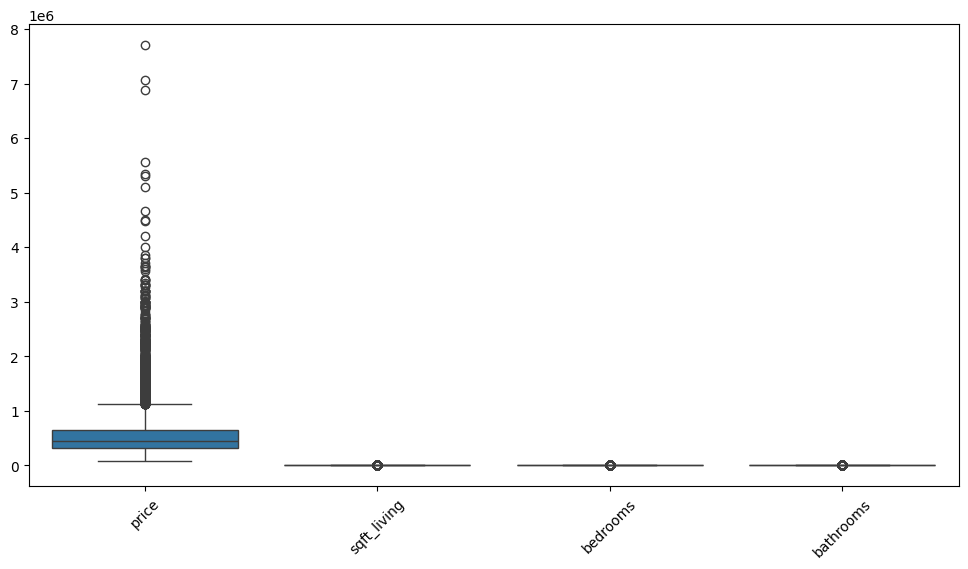

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["price", "sqft_living", "bedrooms", "bathrooms"]])
plt.xticks(rotation=45)
plt.show()

In [38]:
# Si on veut gérer les valeurs aberrantes (cas extrèmes)
# df = df[df["price"] < df["price"].quantile(0.99)]  # Garde 99% des valeurs

# Étape 2 : Analyse Exploratoire (EDA)


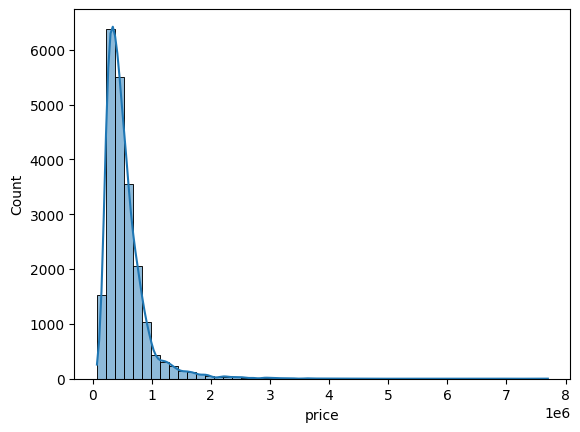

In [39]:
# Distribution des prix
sns.histplot(df["price"], bins=50, kde=True)
plt.show()

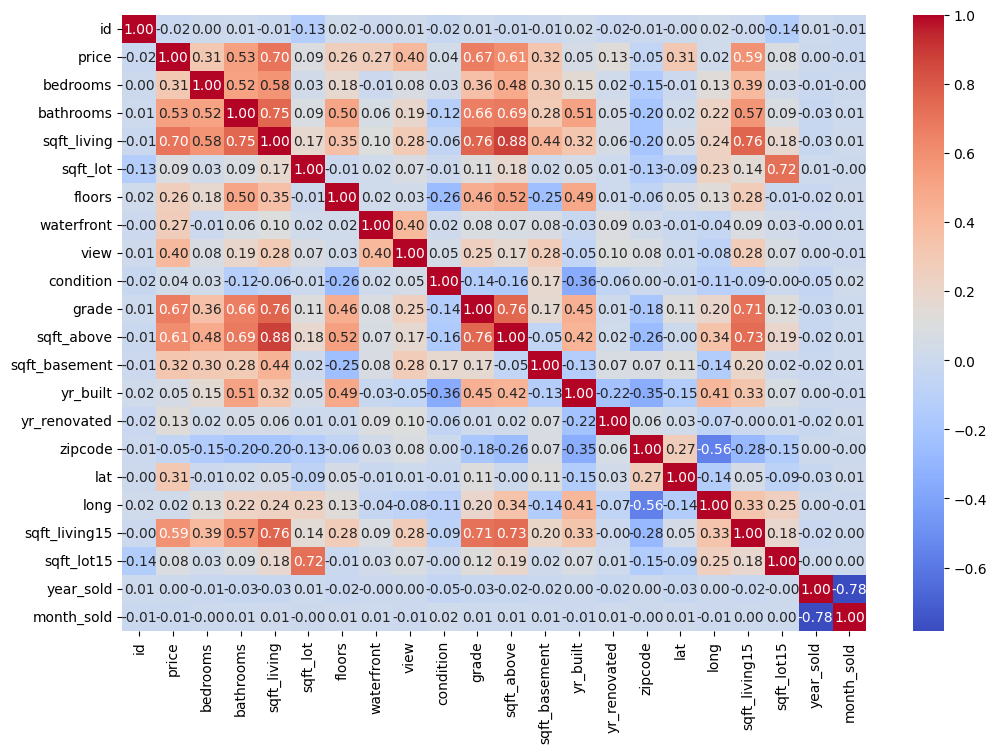

In [40]:
# Corrélations entre variables
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

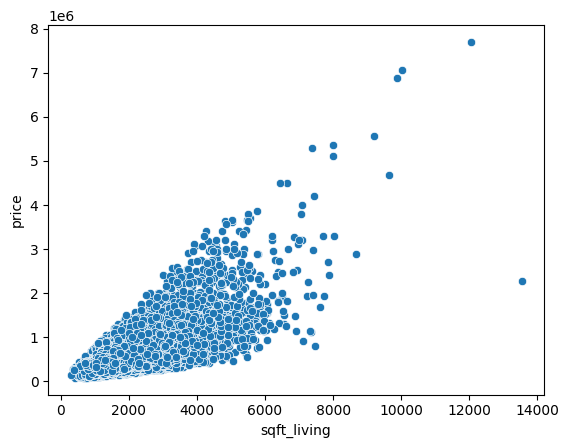

In [41]:
# Lien entre "sqft_living" et "price"
sns.scatterplot(x=df["sqft_living"], y=df["price"])
plt.show()

# Étape 3 : Construction du Modèle

In [42]:
# Séparation en train/test
from sklearn.model_selection import train_test_split

# selected_features = ["sqft_living", "bathrooms", "bedrooms", "floors", "zipcode"]

# X = df[selected_features]  # On garde uniquement ces variables explicatives
# y = df["price"]  # Variable cible

# Sélection des features pertinentes pour la régression
selected_features_regression = [
    "sqft_living",    # Surface habitable
    "bedrooms",       # Nombre de chambres
    "bathrooms",      # Nombre de salles de bain
    "floors",         # Nombre d'étages
    "condition",      # Condition de la maison
    "grade",          # Qualité de la maison
    "yr_built",       # Année de construction
    "yr_renovated",   # Année de rénovation
    "zipcode"         # Code postal
]

# Sélection des données d'entrée X et de la variable cible y pour la régression
X_regression = df[selected_features_regression]  # On garde uniquement ces variables explicatives
y_regression = df["price"]  # Variable cible pour la régression (prix)

X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 9), (4323, 9), (17290,), (4323,))

In [44]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


# Liste des modèles
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree=2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Elastic Net Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR Regression": SVR(kernel="rbf", C=100, epsilon=0.1)
}

In [46]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Sauvegarde des résultats
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

# Affichage des résultats sous forme de DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                                            MAE           MSE           RMSE  \
Linear Regression                 148638.981448  5.875152e+10  242387.132949   
Polynomial Regression (degree=2)  136755.763836  5.306850e+10  230366.016146   
Ridge Regression                  148636.309463  5.875173e+10  242387.562047   
Lasso Regression                  148638.950064  5.875152e+10  242387.135964   
Elastic Net Regression            146906.962586  5.914537e+10  243198.221002   
Decision Tree Regression          128421.124477  6.254400e+10  250087.993507   
Random Forest Regression           96526.320640  3.987291e+10  199682.018184   
SVR Regression                    200987.111458  1.376364e+11  370993.741110   

                                        R²  
Linear Regression                 0.611372  
Polynomial Regression (degree=2)  0.648964  
Ridge Regression                  0.611370  
Lasso Regression                  0.611372  
Elastic Net Regression            0.608767  
Decision 

<ipython-input-47-c730d3c283ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["R²"], y=results_df.index, palette="coolwarm")


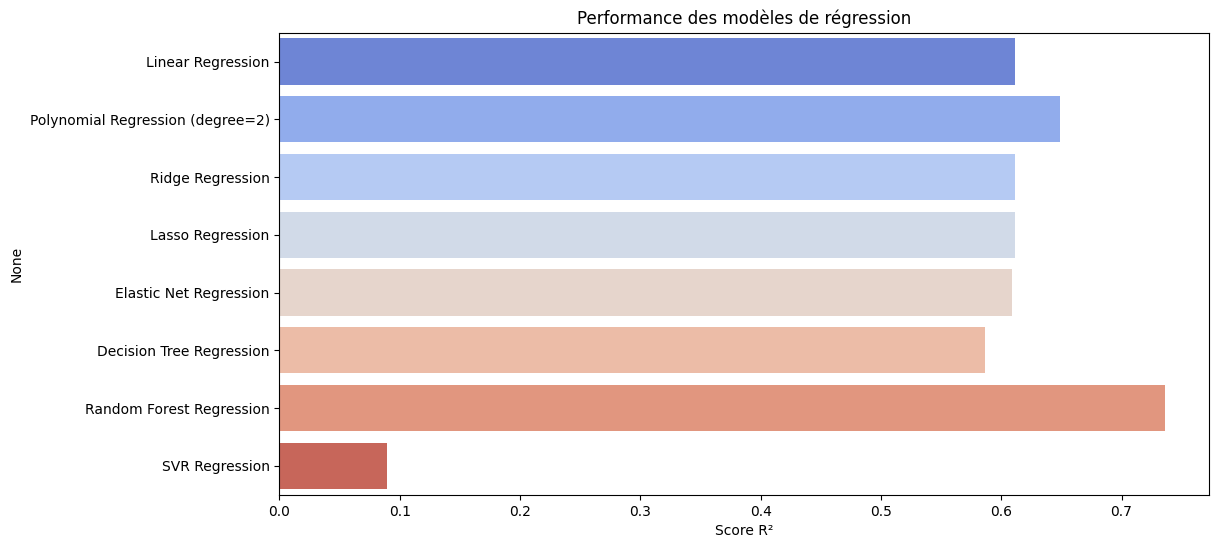

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df["R²"], y=results_df.index, palette="coolwarm")
plt.xlabel("Score R²")
plt.title("Performance des modèles de régression")
plt.show()

In [48]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Charger les données et entraîner le modèle Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Sauvegarder le modèle
joblib.dump(model_rf, 'random_forest_model_5f.pkl')

['random_forest_model_5f.pkl']

In [49]:
df["zipcode"].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

# PREMIERE PARTIE : CLASSIFICATION

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [71]:
# Transformation de la variable cible en catégories
# price_bins = [0, 300000, 600000, np.inf]
# price_labels = ["Bas", "Moyen", "Élevé"]
# df["price_category"] = pd.cut(df["price"], bins=price_bins, labels=price_labels)

# Mettre à jour les intervalles :
# Définir les intervalles de prix avec des limites plus spécifiques
price_bins = [0, 300000, 800000, 1500000, 7700000]
price_labels = ['Bas Prix', 'Moyen Prix', 'Haut Prix', 'Très Haut Prix']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

In [72]:
# Encodage des labels
label_encoder = LabelEncoder()
df["price_category_encoded"] = label_encoder.fit_transform(df["price_category"])

# # Sélection des features
# X = df.drop(columns=["price", "id", "zipcode", "price_category", "price_category_encoded"])
# y = df["price_category_encoded"]

# Sélection des features pertinentes pour la classification
selected_features_classification = [
    "sqft_living",    # Surface habitable
    "bedrooms",       # Nombre de chambres
    "bathrooms",      # Nombre de salles de bain
    "floors",         # Nombre d'étages
    "condition",      # Condition de la maison
    "grade",          # Qualité de la maison
    "yr_built",       # Année de construction
    "yr_renovated",   # Année de rénovation
    "zipcode"         # Code postal
]

# Sélection des données d'entrée X et de la variable cible y pour la classification
X_classification = df[selected_features_classification]  # On garde uniquement ces variables explicatives
y_classification = df["price_category_encoded"]  # Variable cible pour la classification (catégorie de prix)

In [73]:
# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Entraînement des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred, target_names=price_labels)
    }

In [75]:
# Affichage des résultats
for model_name, metrics in results.items():
    print(f"\nModèle : {model_name}")
    print(f"Accuracy : {metrics['Accuracy']:.2f}")
    print("Classification Report :\n", metrics["Classification Report"])


Modèle : Logistic Regression
Accuracy : 0.73
Classification Report :
                 precision    recall  f1-score   support

      Bas Prix       0.65      0.42      0.51       918
    Moyen Prix       0.61      0.47      0.53       494
     Haut Prix       0.76      0.89      0.82      2801
Très Haut Prix       0.63      0.43      0.51       110

      accuracy                           0.73      4323
     macro avg       0.66      0.55      0.59      4323
  weighted avg       0.72      0.73      0.72      4323


Modèle : Decision Tree
Accuracy : 0.76
Classification Report :
                 precision    recall  f1-score   support

      Bas Prix       0.70      0.69      0.69       918
    Moyen Prix       0.53      0.56      0.55       494
     Haut Prix       0.83      0.83      0.83      2801
Très Haut Prix       0.53      0.49      0.51       110

      accuracy                           0.76      4323
     macro avg       0.65      0.64      0.64      4323
  weighted avg     

In [82]:
# Sauvegarde du meilleur modèle
best_model_name = max(results, key=lambda x: results[x]["Accuracy"])
best_model = models[best_model_name]
joblib.dump(best_model, "best_classification_model.pkl")

print(f"Le meilleur modèle est : {best_model_name}")

Le meilleur modèle est : Random Forest


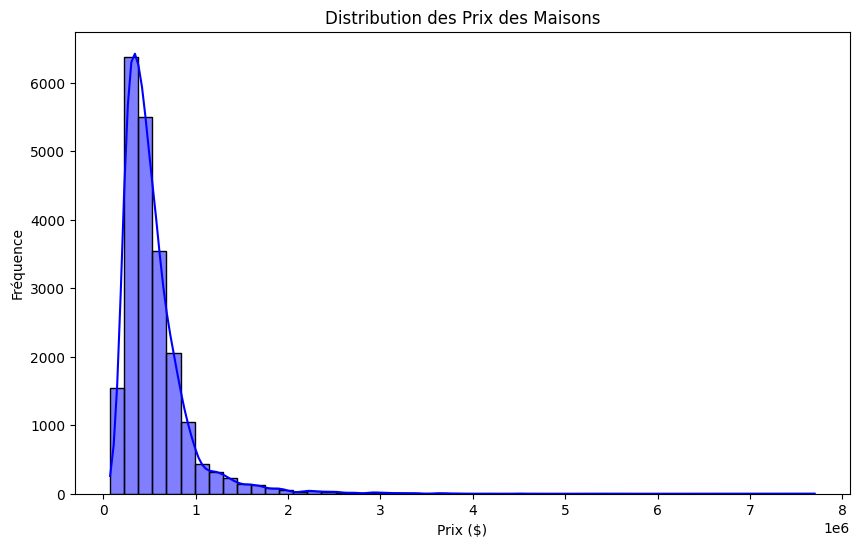

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des prix
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, ax=ax, color='blue')
ax.set_title('Distribution des Prix des Maisons')
ax.set_xlabel('Prix ($)')
ax.set_ylabel('Fréquence')

# Afficher le graphique
plt.show()


In [78]:
# Définir les intervalles de prix
bins = [0, 300000, 800000, 1500000, float('inf')]
labels = ['Bas Prix', 'Moyen Prix', 'Haut Prix', 'Très Haut Prix']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Calculer des statistiques descriptives pour chaque catégorie de prix
price_stats = df.groupby('price_category')['price'].describe()

# Afficher la table
print(price_stats)

                  count          mean            std        min        25%  \
price_category                                                               
Bas Prix         4570.0  2.405158e+05   44259.923635    75000.0   214025.0   
Moyen Prix      14098.0  4.971602e+05  133880.861626   300499.0   385000.0   
Haut Prix        2429.0  1.015782e+06  186319.184420   800500.0   864327.0   
Très Haut Prix    516.0  2.126877e+06  739998.106403  1505000.0  1661500.0   

                      50%        75%        max  
price_category                                   
Bas Prix         249900.0   275000.0   300000.0  
Moyen Prix       475000.0   595000.0   800000.0  
Haut Prix        950000.0  1140000.0  1500000.0  
Très Haut Prix  1880790.0  2350490.0  7700000.0  


<ipython-input-78-d00c1b61472c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df.groupby('price_category')['price'].describe()


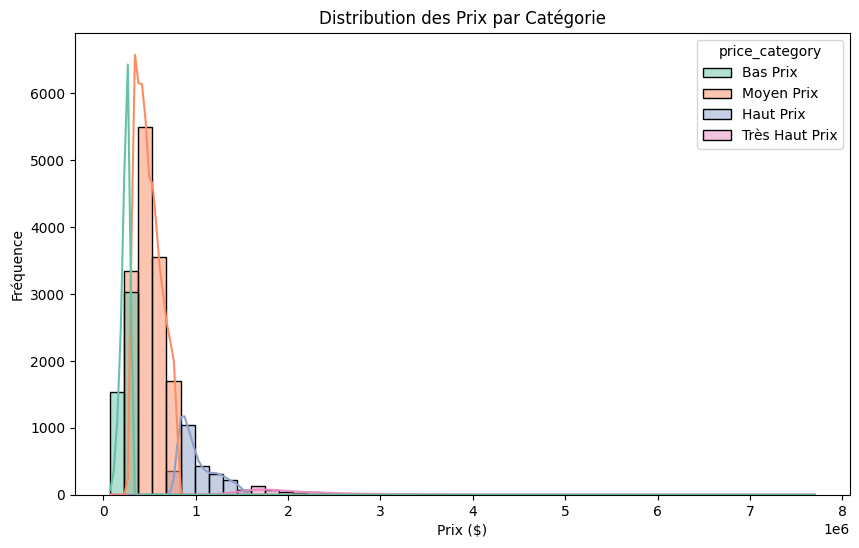

In [79]:
# Afficher la distribution des prix pour chaque catégorie
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df, x='price', hue='price_category', bins=50, kde=True, ax=ax, palette="Set2")
ax.set_title('Distribution des Prix par Catégorie')
ax.set_xlabel('Prix ($)')
ax.set_ylabel('Fréquence')

# Afficher le graphique
plt.show()

<ipython-input-80-4e265fb6367c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_category', y='price', data=df, ax=ax, palette="Set2")


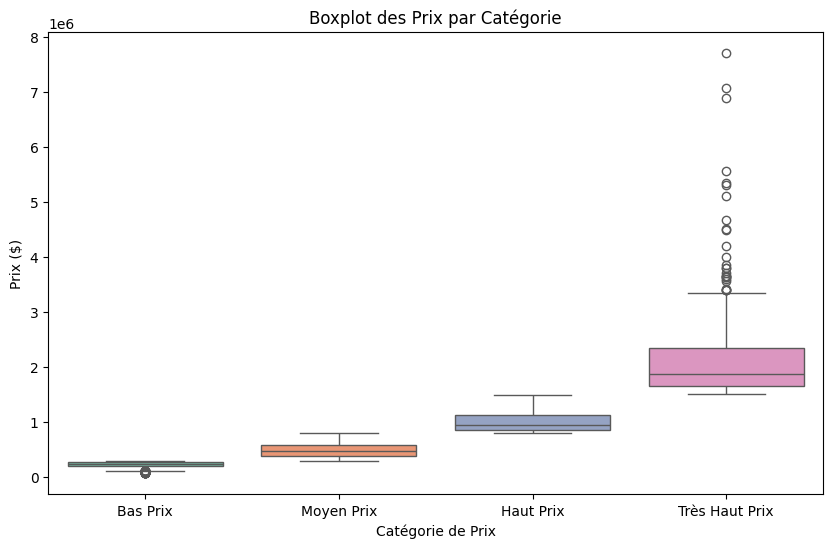

In [80]:
# Boxplot pour visualiser la dispersion des prix dans chaque catégorie
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='price_category', y='price', data=df, ax=ax, palette="Set2")
ax.set_title('Boxplot des Prix par Catégorie')
ax.set_xlabel('Catégorie de Prix')
ax.set_ylabel('Prix ($)')

# Afficher le graphique
plt.show()

In [81]:
# Calculer les prix moyens en fonction des caractéristiques
price_by_features = df.groupby(['bedrooms', 'bathrooms', 'sqft_living', 'floors']).agg({'price': 'mean'}).reset_index()

# Afficher la table
print(price_by_features.head())

   bedrooms  bathrooms  sqft_living  floors     price
0         0        0.0          290     1.0  142000.0
1         0        0.0          844     1.0  139950.0
2         0        0.0         1470     2.0  235000.0
3         0        0.0         1470     3.0  380000.0
4         0        0.0         2460     2.0  355000.0
